Artur Eremov B20-RO-01

a.eremov@innopolis.university

GitHub link(there is just the same work): https://github.com/ipipos56/SensorsAndSensingS23/tree/main/Homework5

# Home assignment 5(a):

This script generates a noisy dataset with a line, adds outliers to the dataset, and then uses the RANSAC algorithm to detect the line parameters. Finally, it visualizes the original dataset, the RANSAC-based line detection with inliers and outliers highlighted in different colors.

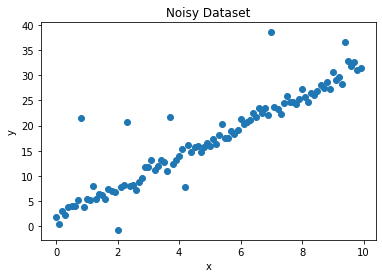

a=2.9306069295914035 b = 1.8191611583622556


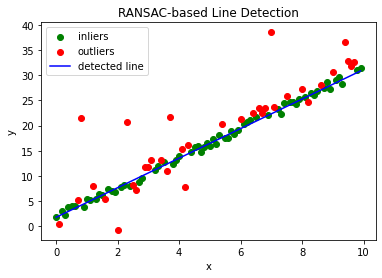

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset with a noisy line
x = np.arange(0, 10, 0.1)
y = 3 * x + 2 + np.random.normal(0, 1, len(x))

# Add outliers to the dataset
outliers_idx = np.random.randint(0, len(x), size=10)
y[outliers_idx] += np.random.normal(0, 10, size=10)

# Visualize the dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Dataset')
plt.show()

# Implement RANSAC algorithm to detect line parameters
n_iterations = 100
sample_size = 2
inlier_threshold = 1
best_inliers = None
best_line = None

for i in range(n_iterations):
    # Randomly select sample points
    sample_idx = np.random.choice(len(x), size=sample_size, replace=False)
    sample_x, sample_y = x[sample_idx], y[sample_idx]

    # Fit line to the sample points
    line_params = np.polyfit(sample_x, sample_y, deg=1)

    # Calculate distance from all points to the line
    distances = np.abs(y - (line_params[0] * x + line_params[1]))

    # Identify inliers (points within inlier_threshold distance from the line)
    inliers = distances < inlier_threshold

    # If current iteration has more inliers than previous best, update best inliers and line parameters
    if best_inliers is None or np.sum(inliers) > np.sum(best_inliers):
        best_inliers = inliers
        best_line = line_params

# Visualize the RANSAC-based line detection
plt.scatter(x[best_inliers], y[best_inliers], color='green', label='inliers')
plt.scatter(x[~best_inliers], y[~best_inliers], color='red', label='outliers')
plt.plot(x, best_line[0] * x + best_line[1], color='blue', label='detected line')
print(f'a={best_line[0]} b = {best_line[1]}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('RANSAC-based Line Detection')
plt.show()



# Home assignment 5(b):

    Load the 3D point cloud dataset using a suitable library such as Open3D or PyntCloud.

    Remove the redundant 3D point clouds belonging to the environment by setting reasonable thresholds on minimal and maximal range.

    Detect the floor plane using a RANSAC-based plane detection algorithm and remove the points belonging to the floor.

    Identify the object by selecting a suitable segmentation algorithm such as Euclidean Clustering, DBSCAN, or MeanShift.

    Mark the object in the 3D point cloud by changing the object's color.
    
    Estimate the distance to the object by finding the minimal depth measurement in the remaining point cloud.

In [ ]:
import open3d as o3d

# Load point cloud data
pcd = o3d.io.read_point_cloud("pointcloud.pcd")

# Remove redundant points
min_range = 0.5  # set the minimum range
max_range = 5.0  # set the maximum range
pcd = pcd.crop(o3d.geometry.AxisAlignedBoundingBox([min_range, min_range, min_range], [max_range, max_range, max_range]))

# Detect the floor plane
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01, ransac_n=3, num_iterations=1000)
outliers = pcd.select_by_index(inliers, invert=True)
floor_points = pcd.select_by_index(inliers)

# Remove the floor points
pcd = outliers

# Identify the object using Euclidean Clustering
clustering = pcd.cluster_dbscan(eps=0.5, min_points=10)

# Mark the object by changing its color
colors = [[1, 0, 0] for i in range(len(clustering))]
for i in range(len(clustering)):
    for j in clustering[i]:
        colors[j] = [0, 1, 0]
pcd.colors = o3d.utility.Vector3dVector(colors)

# Estimate the distance to the object (minimal depth)
distances = pcd.compute_depth()
min_depth = min(distances)

print("Minimal depth to the object: ", min_depth)
o3d.visualization.draw_geometries([pcd])
